In [17]:
import os
import glob
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.cm as cm

import csv 
import pandas as pd
import numpy as np
%matplotlib inline
from pandas import DataFrame, read_csv
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import scipy.special as sse
from scipy.stats import chisquare


In [18]:
cd /Users/austinmcdonald/Desktop/Xenon/RGA-Edrift/

/Users/austinmcdonald/Desktop/Xenon/RGA-Edrift


In [25]:
files = glob.glob("*.txt")
files.sort()
files  = files[0::2]
files

['Xe-000.txt',
 'Xe-002.txt',
 'Xe-003-2.txt',
 'Xe-003.txt',
 'Xe-008.txt',
 'Xe-015.txt',
 'Xe-035-S.txt',
 'Xe-035.txt',
 'Xe-050.txt',
 'Xe-065.txt',
 'Xe-085.txt',
 'Xe-095.txt',
 'Xe-099.txt',
 'Xe-100.txt']

In [26]:
files = [files[0],files[1],files[2],files[4],files[5],files[6],files[-2],files[-1]]
files

['Xe-000.txt',
 'Xe-002.txt',
 'Xe-003-2.txt',
 'Xe-008.txt',
 'Xe-015.txt',
 'Xe-035-S.txt',
 'Xe-099.txt',
 'Xe-100.txt']

In [27]:
Norm = [1.09e-5,2.3e-5,2.56e-5,1.4e-5,1.35e-5,2.5e-5,1.33e-5,1.28e-5]
#Norm = [1.09e-5,1.09e-5,2.4e-5,1.9e-5,1.4e-5,1.3e-5,1.2e-5,1.2e-5,1.33e-5,1.28e-5]


In [28]:
name    = []
Percent = []
DataX   = dict()
DataY   = dict()
for x in range(0,len(files)):
    nameH = files[x].split(".")[0]
    name.append(nameH)
    PerH = int(nameH.split("-")[1])
    Percent.append(PerH)
    DAT =  np.genfromtxt(files[x],delimiter=',',skip_header=20)
    DataX[x] = DAT[:,0]
    DataY[x] = DAT[:,1]


In [29]:
Percent

[0, 2, 3, 8, 15, 35, 99, 100]

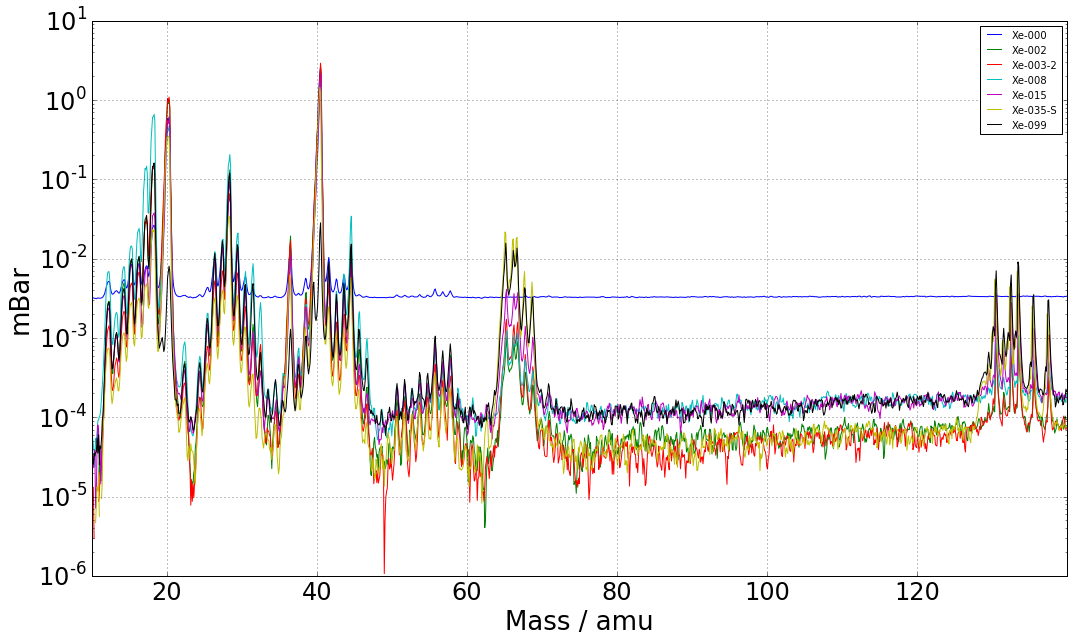

In [30]:
plt.figure(figsize=(15,9))
#for x in range(0,len(files)):
for x in range(0,7):

    plt.semilogy(DataX[x],DataY[x]/Norm[x],label=name[x])
    
plt.xlabel('Mass / amu',fontsize=26)

plt.ylabel('mBar',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xticks(np.arange(0, 140, 20))
plt.xlim(10,140)
#plt.ylim(1e-9,3e-5)
plt.grid()
plt.legend(loc='upper right',fontsize=10)
plt.tight_layout()


plt.show()

In [31]:
def AREA_FINDERBBB(X,Y):
    Ar1 = np.where(X==19.5)[0][0]
    Ar2 = np.where(X==20.5)[0][0]
    Ar3 = np.where(X==36)[0][0]
    Ar4 = np.where(X==37)[0][0]
    Ar5 = np.where(X==40)[0][0]
    Ar6 = np.where(X==41)[0][0]
    Xe1 = np.where(X==84)[0][0]
    Xe2 = np.where(X==94)[0][0]
    Xe3 = np.where(X==100)[0][0]
    Xe4 = np.where(X==112)[0][0] 
    
    
    argon1 = np.sum(Y[Ar1:Ar2])
    argon2 = np.sum(Y[Ar3:Ar4])
    argon3 = np.sum(Y[Ar5:Ar6])
    Xenon1 = np.sum(Y[Xe1:Xe2])
    Xenon2 = np.sum(Y[Xe3:Xe4])
    A = argon1+argon2+argon3
    B = Xenon1+Xenon2
    return A,B

In [32]:
x=6
AREA_FINDERBBB(DataX[x],DataY[x]/Norm[x])

(0.12885789473684212, 0.028885714285714285)

In [33]:
x=1
AREA_FINDERBBB(DataX[x],DataY[x]/Norm[x])

(13.007978260869567, 0.012609434782608696)

In [46]:
def AREA_FINDER(X,Y):
    Ar1 = np.where(X==19.5)[0][0]
    Ar2 = np.where(X==20.5)[0][0]
    Ar3 = np.where(X==36)[0][0]
    Ar4 = np.where(X==37)[0][0]
    Ar5 = np.where(X==40)[0][0]
    Ar6 = np.where(X==41)[0][0]
    Xe1 = np.where(X==64)[0][0]
    Xe2 = np.where(X==74)[0][0]
    Xe3 = np.where(X==128)[0][0]
    Xe4 = np.where(X==140)[0][0] 
    
    
    argon1 = np.sum(Y[Ar1:Ar2])
    argon2 = np.sum(Y[Ar3:Ar4])
    argon3 = np.sum(Y[Ar5:Ar6])
    Xenon1 = np.sum(Y[Xe1:Xe2])
    Xenon2 = np.sum(Y[Xe3:Xe4])
    A = argon1+argon2+argon3
    B = Xenon1+Xenon2
    return A,B

In [141]:
A=[]
A.append(13.007978260869567)
B=[]
B.append(0.035889843749999997)
for x in [1,2,3,4,5,6,7]:
    a,b =AREA_FINDER(DataX[x],DataY[x]/Norm[x])
    A.append(a)
    B.append(b)
A = np.array(A)
B = np.array(B)

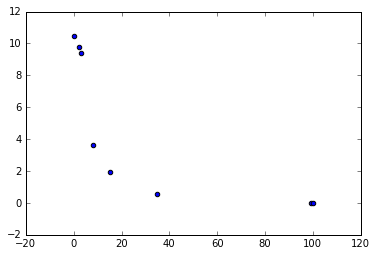

In [147]:
plt.scatter(Percent,(A/max(A))/(B/max(B)))


In [97]:
mine=[]
for x in [1,3,4,5,6]:
    a,b =AREA_FINDER(DataX[x],DataY[x]/Norm[x])
    mine.append(a/b)
pp  =[2,8,15,35,99]

In [62]:
KnownA=[0,3,100]
KnownB=[13.007978260869567/0.035889843749999997,326.958647937,0.119853145802]

In [140]:
All=[]
#All.append(13.007978260869567/0.035889843749999997)
All.append(0.035889843749999997/13.007978260869567)

for x in [1,2,3,4,5,6,7]:
    a,b =AREA_FINDER(DataX[x],DataY[x]/Norm[x])
    print("a",a)
    print("b",b)
    All.append(b/a)
All

a 13.0079782609
b 0.0384315652174
a 15.6753554688
b 0.0479429296875
a 8.004405
b 0.0632014285714
a 8.97116
b 0.133276814815
a 7.2552584
b 0.372251
a 0.128857894737
b 0.349692481203
a 0.05417109375
b 0.45197890625


[0.002759063939856308,
 0.0029544610581800131,
 0.0030584907489388568,
 0.0078958309295230032,
 0.014856140656817491,
 0.051307752181507425,
 2.7137839083679056,
 8.3435440372661844]

In [138]:
Percent

[0, 2, 3, 8, 15, 35, 99, 100]

In [109]:
from scipy import optimize

def test_func(x, a, b):
    return a * x**3 +b*x**2
    #return a * np.exp(-x) +b
params, params_covariance = optimize.curve_fit(test_func, Percent,All)
params

array([-0.00059505,  0.05919217])

//anaconda/envs/py35/lib/python3.5/site-packages/scipy/optimize/minpack.py:690: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


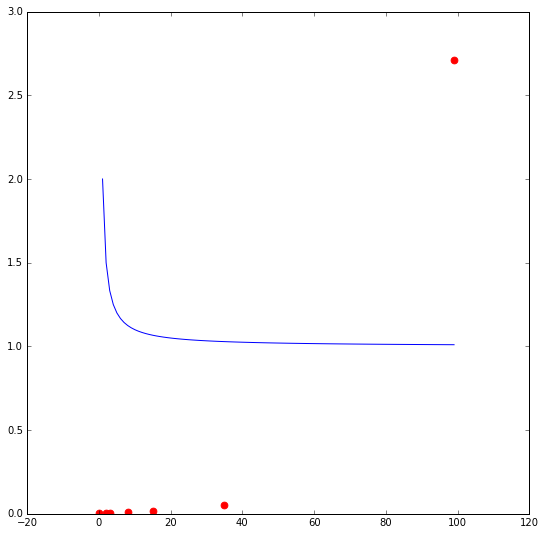

In [135]:
def test_func(x, a, b):
    return a * 1/x +b

plt.figure(figsize=(9,9))
plt.scatter(Percent,All,s=45,color='r')
params, params_covariance = optimize.curve_fit(test_func, Percent, All)
x_new = np.arange(100)
plt.plot(x_new, test_func(x_new,*params))

plt.ylim(0,3)
plt.show()

In [78]:
Percent

[0, 2, 3, 8, 15, 35, 99, 100]

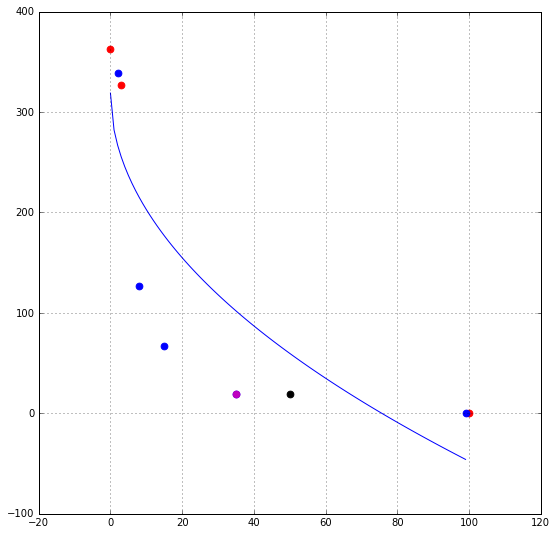

In [117]:
plt.figure(figsize=(9,9))
plt.scatter(KnownA,KnownB,s=45,color='r')
x_new = np.arange(100)
#plt.plot(x_new, test_func(x_new,300,0))
plt.plot(x_new, test_func(x_new,*params))

plt.scatter(pp,mine,s=45,color='b')

Q=5    
a,b =AREA_FINDER(DataX[Q],DataY[Q]/Norm[Q])
plt.scatter(Percent[Q],a/b,s=45,color='m')
plt.scatter(Percent[Q]+15,a/b,s=45,color='k')

plt.grid()

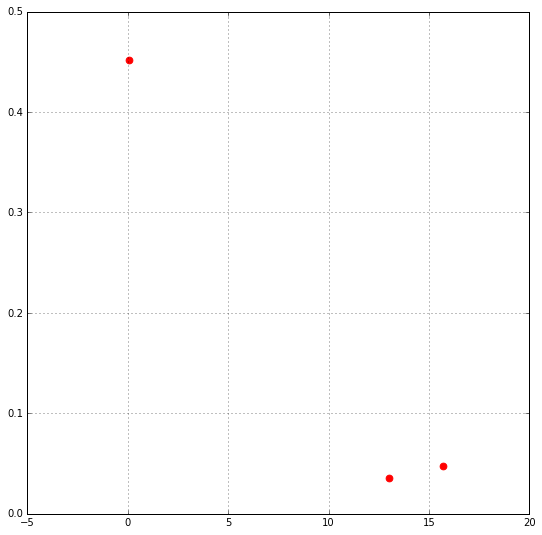

In [119]:
plt.figure(figsize=(9,9))
plt.scatter(13.007978260869567,0.035889843749999997,s=45,color='r')
for x in [2,7]:
    a,b =AREA_FINDER(DataX[x],DataY[x]/Norm[x])
    plt.scatter(a,b,s=45,color='r')
plt.grid()

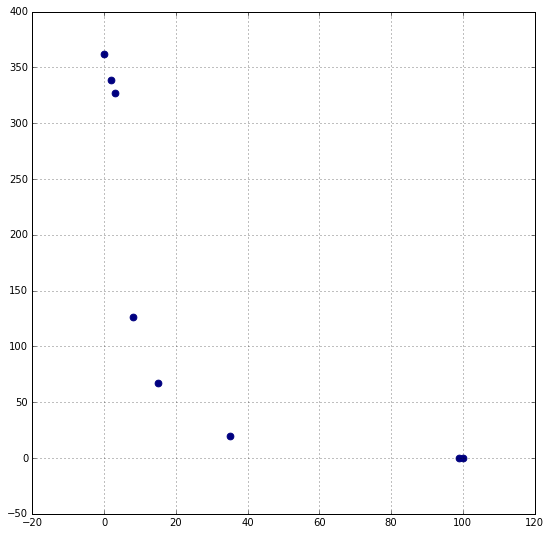

In [35]:
plt.figure(figsize=(9,9))
plt.scatter(0,13.007978260869567/0.035889843749999997,s=45,color='navy')
for x in range(1,len(files)):
    a,b =AREA_FINDER(DataX[x],DataY[x]/Norm[x])
    plt.scatter(Percent[x],a/b,s=45,color='navy')
plt.grid()

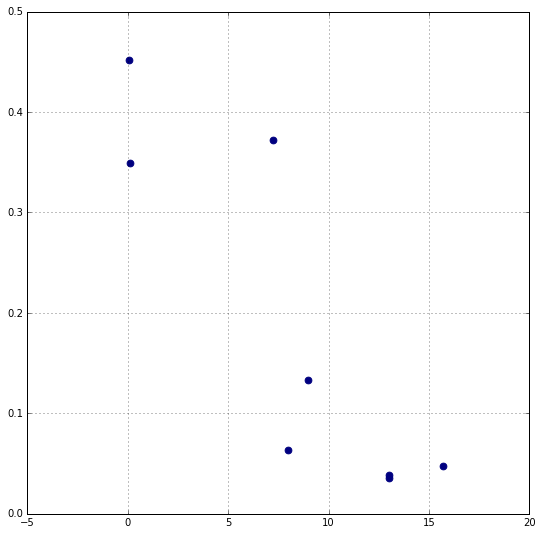

In [120]:
plt.figure(figsize=(9,9))
plt.scatter(13.007978260869567,0.035889843749999997,s=45,color='navy')
for x in range(1,len(files)):
    a,b =AREA_FINDER(DataX[x],DataY[x]/Norm[x])
    plt.scatter(a,b,s=45,color='navy')
plt.grid()